In [75]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [76]:
datasets = ['BLK', 'BAC']
for dataset in datasets:
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start='2023-09-01', end ='2023-10-16')
    filename = f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f'Download data for {dataset} and saved as {filename}')

Download data for BLK and saved as BLK_data.csv
Download data for BAC and saved as BAC_data.csv


In [77]:
Ticker = 'BLK','BAC'
start_date = '2023-09-01'
end_date = '2023-10-16'
data = yf.download(Ticker, start=start_date, end=end_date)['Close']

[*********************100%%**********************]  2 of 2 completed


In [78]:
data.head()

,BAC,BLK
Date,,
2023-09-01,28.980000,706.190002
2023-09-05,28.650000,695.929993
2023-09-06,28.389999,694.179993
2023-09-07,28.129999,691.059998
2023-09-08,28.360001,690.619995


In [82]:
data['BLK'].mean()/100

6.664673278808594

In [83]:
data['BLK'].std()/100

0.27235301460412487

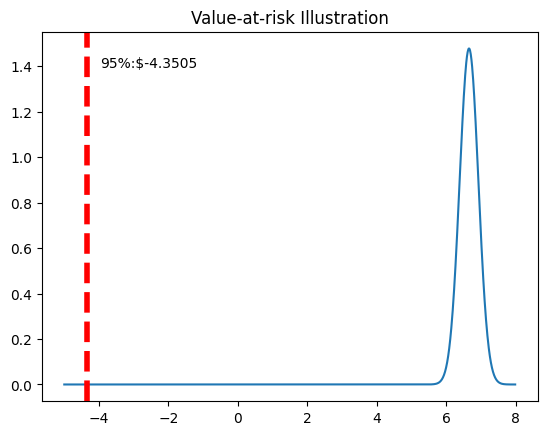

In [85]:
mean = 6.66
std = 0.27
x = np.arange(-5, 8, 0.01)
y = norm.pdf(x, mean, std)
pdf = plt.plot(x, y)
min_ylim, max_ylim = plt.ylim()
plt.text(np.percentile(x, 8), max_ylim*0.9, '95%:${:.4f}'
         .format(np.percentile(x, 5)))
plt.axvline(np.percentile(x, 5), color='r', linestyle='dashed', linewidth=4)
plt.title('Value-at-risk Illustration')
plt.show()

In [52]:
stock_retur = (np.log(data) - np.log(data.shift(1))).dropna()

In [53]:
stock_retur.columns

Index(['BAC', 'BLK'], dtype='object')

In [54]:
weights = np.random.random(len(stock_retur.columns))

In [55]:
weights

array([0.15742449, 0.11581522])

In [56]:
weights /= np.sum(weights)

In [57]:
weights

array([0.57614059, 0.42385941])

In [58]:
cov_var = stock_retur.cov()

In [59]:
cov_var

,BAC,BLK
BAC,0.000146,0.000079
BLK,0.000079,0.000105


In [60]:
stock_mean = stock_retur.mean()

In [61]:
port_std = np.sqrt(weights.T.dot(cov_var).dot(weights))

In [62]:
port_std

0.0102892771644374

In [63]:
initial_investement = 1e6
conf_level = 0.95

In [64]:
from scipy.stats import norm

In [65]:
def Var_parametric(initial_investement, conf_level):
    alpha = norm.ppf(1 - conf_level, stock_mean, port_std)
    for i, j in zip(stock_retur.columns, range(len(stock_retur.columns))):
        Var_param = (initial_investement - initial_investement * ( 1 + alpha))
        print("Parameters VaR result for {} is {}".format(i, Var_param))
    Var_param = (initial_investement-initial_investement * ( 1 + alpha))
    print('--' * 25)
    return Var_param

In [66]:
var_param = Var_parametric(initial_investement, conf_level)
var_param

Parameters VaR result for BAC is [19672.55063103 20989.3807509 ]
Parameters VaR result for BLK is [19672.55063103 20989.3807509 ]
--------------------------------------------------


array([19672.55063103, 20989.3807509 ])

In [67]:
var_param


array([19672.55063103, 20989.3807509 ])

<ipython-input-74-7f25416ba3b5>:6: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(var_horizon[:time_horizon], 'o', c='blue', marker='*', label='BAC')
<ipython-input-74-7f25416ba3b5>:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(var_horizon[:time_horizon: time_horizon + 20], 'o', c='green', marker='o', label='BLK')


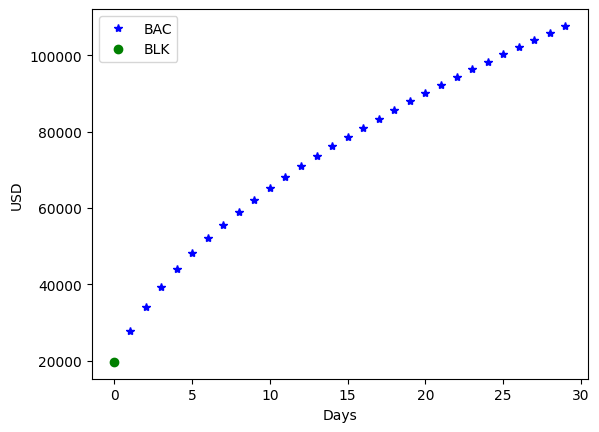

In [74]:
var_horizon =[]
time_horizon = 30
for j in range(len(stock_retur.columns)):
    for i in range(1, time_horizon + 1 ):
        var_horizon.append(var_param[j] * np.sqrt(i))
plt.plot(var_horizon[:time_horizon], 'o', c='blue', marker='*', label='BAC')
plt.plot(var_horizon[:time_horizon: time_horizon + 20], 'o', c='green', marker='o', label='BLK')
plt.xlabel('Days')
plt.ylabel('USD')
plt.legend()
plt.show()